# Multimodal Search Engine — Assignment Showcase

This notebook presents the core features of the project: data preparation, embedding generation, text-to-image and image-to-text search using CLIP on the Flickr-8k dataset, plus brief analysis and how to run the web app.


## 1. Setup and Imports


In [29]:
# Add src to path and import libraries
import sys, os, json
sys.path.append('../src')

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import torch
from sklearn.metrics.pairwise import cosine_similarity

from data_preparation import Flickr8kDataProcessor
from search_engine import MultimodalSearchEngine

# Robust plotting style
try:
    plt.style.use('seaborn-v0_8')
except Exception:
    try:
        plt.style.use('seaborn')
    except Exception:
        pass
try:
    sns.set_palette("husl")
except Exception:
    pass

print("✅ Imports ready. Torch CUDA:", torch.cuda.is_available())


✅ Imports ready. Torch CUDA: False


## 2. Dataset and Embeddings Check


In [30]:
# Verify dataset files and embeddings presence
DATA_DIR = os.path.join('..', 'data') if not os.path.exists('data') else 'data'
EMB_DIR = os.path.join('..', 'embeddings') if not os.path.exists('embeddings') else 'embeddings'

images_dir = os.path.join(DATA_DIR, 'Images')
captions_file = os.path.join(DATA_DIR, 'captions.txt')
meta_file = os.path.join(EMB_DIR, 'metadata.json')

print('Images dir exists:', os.path.exists(images_dir))
print('Captions file exists:', os.path.exists(captions_file))
print('Embeddings metadata exists:', os.path.exists(meta_file))

if os.path.exists(meta_file):
    try:
        with open(meta_file, 'r') as f:
            md = json.load(f)
        print('Metadata:', md)
    except Exception as e:
        print('⚠️ Could not read metadata:', e)


Images dir exists: True
Captions file exists: True
Embeddings metadata exists: True
Metadata: {'num_images': 8091, 'num_texts': 40455, 'num_pairs': 40455, 'embedding_dim': 512}


## 3. Initialize Processor and Search Engine


In [31]:
# Initialize data processor (for loading or regenerating embeddings if needed)
# Use paths relative to this notebook
processor = Flickr8kDataProcessor(data_dir=DATA_DIR, embeddings_dir=EMB_DIR)

# Try to load existing embeddings
img_emb, txt_emb, pairs, md = processor.load_embeddings()

# Initialize search engine (uses embeddings and CLIP for queries)
try:
    search_engine = MultimodalSearchEngine(embeddings_dir=EMB_DIR, data_dir=DATA_DIR)
    print("✅ Search engine initialized.")
except Exception as e:
    print("⚠️ Could not initialize search engine:", e)
    print("If embeddings are missing or corrupted, run: python ../src/data_preparation.py")


Loading CLIP model on cpu...
CLIP model loaded successfully!
Loading saved embeddings...
Embeddings loaded successfully!
Loading CLIP model on cpu...
Embeddings loaded successfully!
Available images: 8091
Available texts: 40455
Search engine initialized successfully!
✅ Search engine initialized.


## 4. Text-to-Image Search Demo



🔍 Query: a dog running in the park
Searching for: 'a dog running in the park'

=== Search Results for 'a dog running in the park' ===
Search type: text_to_image
Found 3 results



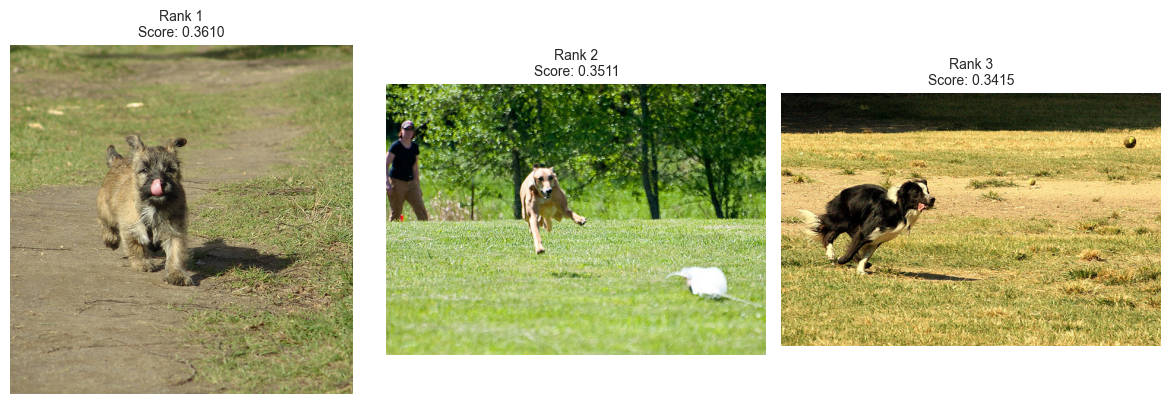


Detailed Results:

Rank 1:
  Similarity Score: 0.3610
  Image ID: 2297471897_3419605c16.jpg
  Captions:
    1. a dog playing ouside
    2. a little dog running with his tongue hanging out
    3. A small tan dog walks down a dirt path and licks his nose .
    4. Small brown dog licks lips as it runs across grass and dirt .
    5. The brown dog is walking along a grassy path with its tongue out .

Rank 2:
  Similarity Score: 0.3511
  Image ID: 3540416139_c884f38351.jpg
  Captions:
    1. A dog chases a toy in the grass with its owner in the background .
    2. A dog chases a white animal on a green lawn .
    3. A dog playing outside in the grass .
    4. A golden dog is running across the grass chasing a white toy on the ground .
    5. The brown dog is running outside on the grass .

Rank 3:
  Similarity Score: 0.3415
  Image ID: 895502702_5170ada2ee.jpg
  Captions:
    1. A black and white dog is chasing a ball on an open plane .
    2. A black and white dog is running through a gras

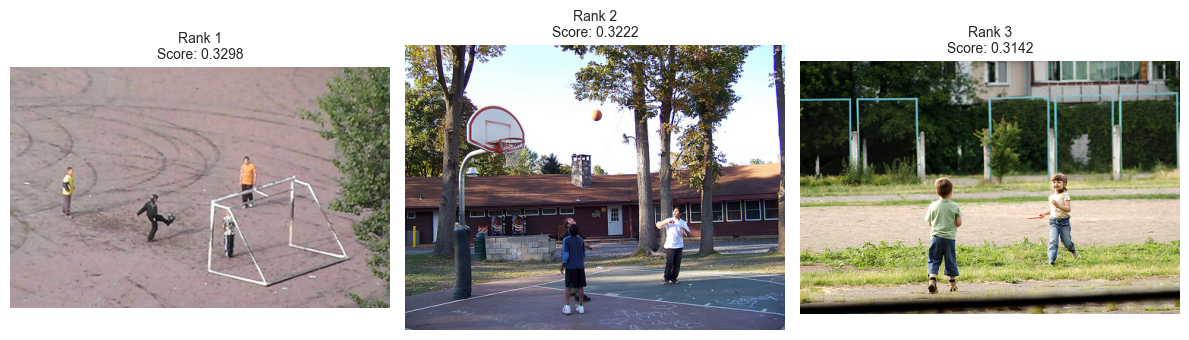


Detailed Results:

Rank 1:
  Similarity Score: 0.3298
  Image ID: 300500054_56653bf217.jpg
  Captions:
    1. Four guys playing soccer on the pavement .
    2. Four people are playing soccer in a desolate field with a tree nearby .
    3. Four people playing soccer at a distance .
    4. Four people playing soccer on a brown surface .
    5. four soccer players play on the pavement .

Rank 2:
  Similarity Score: 0.3222
  Image ID: 2915183095_4ed4aa4f37.jpg
  Captions:
    1. people playing , basketball ball in air
    2. A group of boys play basketball outside of a brown building .
    3. Three people stand on a basketball court as a ball flies through the air .
    4. Three teen boys playing basketball outside
    5. Three teens watching a basketball in the air .

Rank 3:
  Similarity Score: 0.3142
  Image ID: 2597958208_e03aa149c9.jpg
  Captions:
    1. A little boy and a little girl playing together outside .
    2. A little girl and boy play Frisbee together in a grassy area .
   

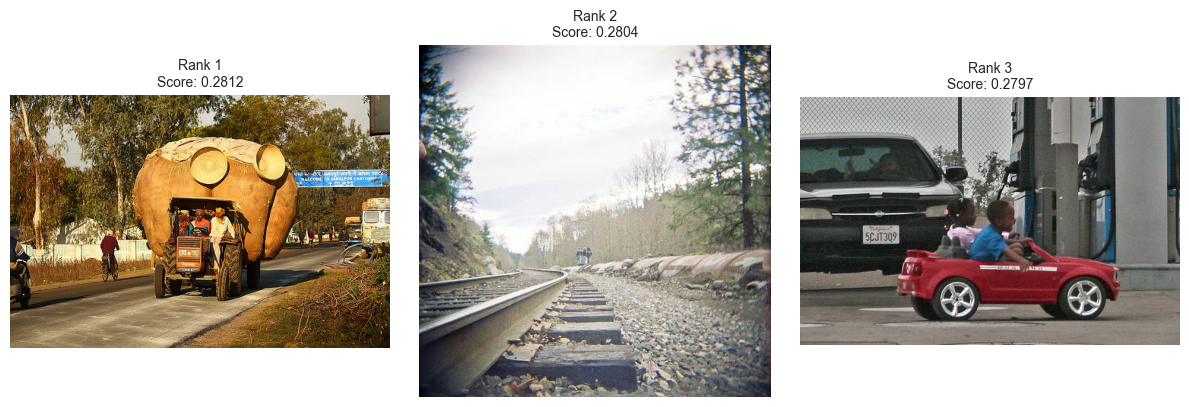


Detailed Results:

Rank 1:
  Similarity Score: 0.2812
  Image ID: 3217240672_b99a682026.jpg
  Captions:
    1. A group of people ride down the road in a large tractor .
    2. A tractor decorated as a float for a parade
    3. A tractor pulling a wagon with a giant pumpkin covered in cloth and two wicker baskers on it drives down a road with people nearby .
    4. Several people ride in a very odd looking truck .
    5. Three men are driving a tractor that is carrying a huge brown object .

Rank 2:
  Similarity Score: 0.2804
  Image ID: 3215108916_0473007b47.jpg
  Captions:
    1. A group of people walking on the side of a railroad track .
    2. A long view of a curving railroad track with a group of people off in the distance .
    3. Looking along a railroad track at people in the distance .
    4. People are walking away from the camera , along railroad tracks .
    5. People near railroad tracks in the woods .

Rank 3:
  Similarity Score: 0.2797
  Image ID: 1787222774_d5c68cce53.

In [32]:
# Example text queries
example_queries = [
    "a dog running in the park",
    "people playing sports",
    "a car on the road",
]

if 'search_engine' in globals():
    for q in example_queries:
        print("\n🔍 Query:", q)
        res = search_engine.search_text_to_image(q, top_k=3)
        search_engine.display_search_results(res, q, search_type='text_to_image')
        search_engine.analyze_search_results(res, q)
else:
    print("Search engine not initialized. Skipping demo.")


## 5. Image-to-Text Search Demo


Using sample image: ..\data\Images\1000268201_693b08cb0e.jpg
Searching for image: ..\data\Images\1000268201_693b08cb0e.jpg

=== Search Results for '..\data\Images\1000268201_693b08cb0e.jpg' ===
Search type: image_to_text
Found 5 results



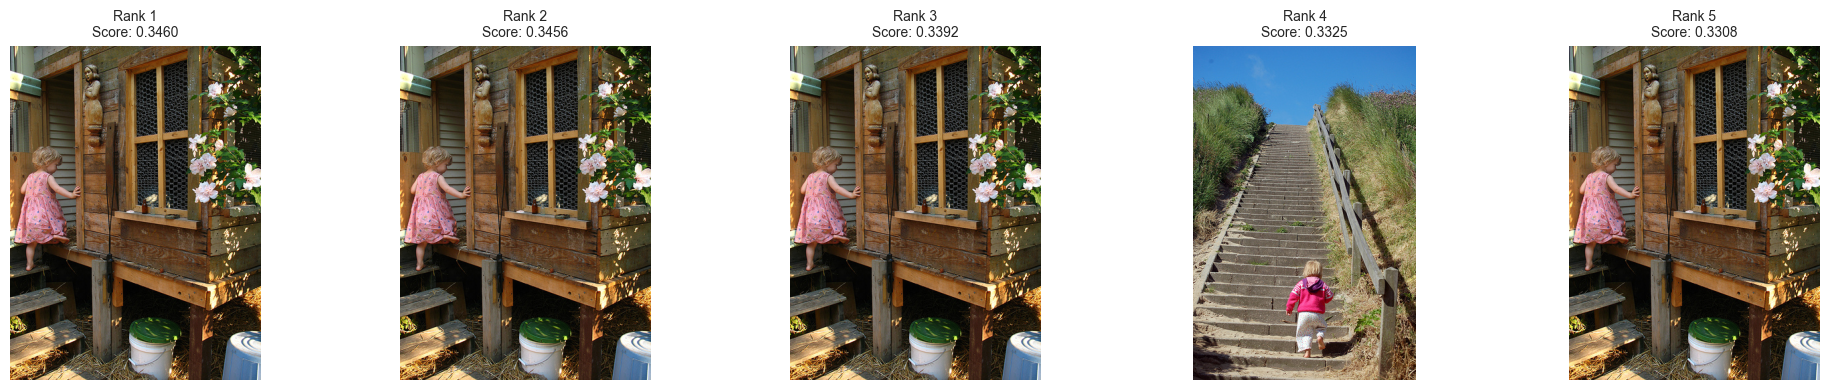


Detailed Results:

Rank 1:
  Similarity Score: 0.3460
  Caption: A little girl in a pink dress going into a wooden cabin .
  Image ID: 1000268201_693b08cb0e.jpg

Rank 2:
  Similarity Score: 0.3456
  Caption: A little girl climbing the stairs to her playhouse .
  Image ID: 1000268201_693b08cb0e.jpg

Rank 3:
  Similarity Score: 0.3392
  Caption: A little girl climbing into a wooden playhouse .
  Image ID: 1000268201_693b08cb0e.jpg

Rank 4:
  Similarity Score: 0.3325
  Caption: A baby girl wearing a pink jacket climbs wooden steps .
  Image ID: 2659606300_bea3feaf8b.jpg

Rank 5:
  Similarity Score: 0.3308
  Caption: A child in a pink dress is climbing up a set of stairs in an entry way .
  Image ID: 1000268201_693b08cb0e.jpg

=== Analysis of Search Results for '..\data\Images\1000268201_693b08cb0e.jpg' ===
Score Statistics:
  Highest score: 0.3460
  Lowest score: 0.3308
  Average score: 0.3388
  Score range: 0.0153

Content Analysis:
  Most common words in results: ['a', '.', 'girl', 'li

In [33]:
# Pick an image from the dataset for the demo
sample_image = None
if os.path.exists(images_dir):
    # Find the first jpg in Images/
    for name in os.listdir(images_dir):
        if name.lower().endswith('.jpg'):
            sample_image = os.path.join(images_dir, name)
            break

if sample_image and 'search_engine' in globals():
    print('Using sample image:', sample_image)
    results = search_engine.search_image_to_text(sample_image, top_k=5)
    search_engine.display_search_results(results, sample_image, search_type='image_to_text')
    search_engine.analyze_search_results(results, sample_image)
else:
    print('No sample image found or search engine not initialized.')


## 6. Quick Quantitative Analysis


Searching for: 'a dog running in the park'
Searching for: 'people playing sports'
Searching for: 'a beautiful sunset over the ocean'


,query,max,mean,min,range
0,a dog running in the park,0.361014,0.346470,0.338135,0.022879
1,people playing sports,0.329848,0.318691,0.313589,0.016259
2,a beautiful sunset over the ocean,0.281872,0.262331,0.254899,0.026973


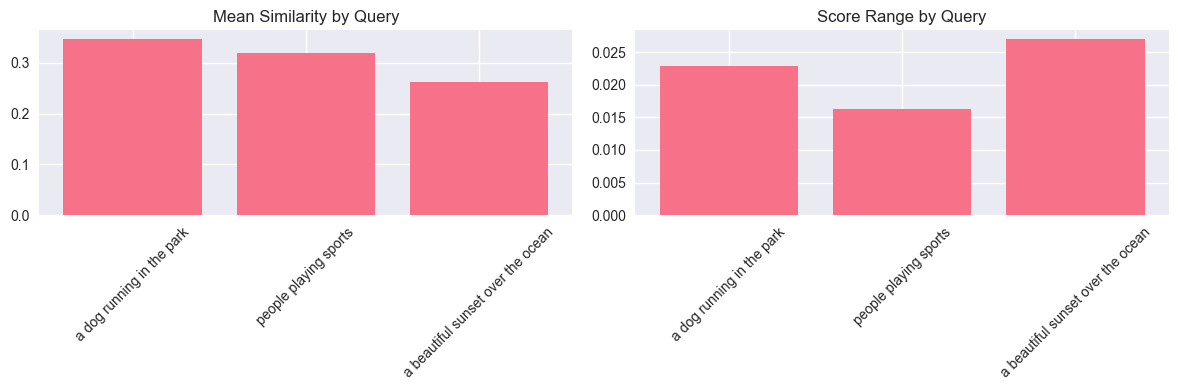

In [34]:
# Compare similarity score stats across a few queries
import numpy as np
import pandas as pd

queries = [
    "a dog running in the park",
    "people playing sports",
    "a beautiful sunset over the ocean",
]

if 'search_engine' in globals():
    rows = []
    for q in queries:
        res = search_engine.search_text_to_image(q, top_k=5)
        if res:
            scores = [r['similarity_score'] for r in res]
            rows.append({
                'query': q,
                'max': float(np.max(scores)),
                'mean': float(np.mean(scores)),
                'min': float(np.min(scores)),
                'range': float(np.max(scores) - np.min(scores))
            })
    df = pd.DataFrame(rows)
    if not df.empty:
        display(df)
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].bar(df['query'], df['mean'])
        axes[0].set_title('Mean Similarity by Query')
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].bar(df['query'], df['range'])
        axes[1].set_title('Score Range by Query')
        axes[1].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print('No results to analyze.')
else:
    print('Search engine not initialized. Skipping analysis.')


## 7. How to Run the Web Interface

Run this in a terminal at the project root:

```bash
streamlit run src/web_interface.py
```

This opens an interactive app with both search modes and built-in analysis.
